#1. Import library

In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns


#2. Load the Dataset

In [ ]:
df=pd.read_csv("/content/online_retail.csv")


#3.Understanding Online retail sales through

In [ ]:
#understanding the shape of the dataset
print("the no rows in this dataset is:",df.shape[0],"and no of column is:",df.shape[1])

the no rows in this dataset is: 541909 and no of column is: 8


In [ ]:
#Display the first 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Display columns name
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#statiscal information
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Display missing missing_value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#Converting columns to the correct data type
df['InvoiceDate']   =  pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#managing missing_value
df=df.dropna()


In [ ]:
df.shape

(406829, 8)

In [ ]:
#managing negative value
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [ ]:
df.shape

(397884, 8)

In [ ]:
#calculate revenue for each transaction

df['revenue']=df['Quantity']*df['UnitPrice']

#1 total revenue
total_revenue  = df['revenue'].sum()

#2 Average revenue per_transcation
avg_revenue = df['revenue'].mean()

#3  total_item sold
total_item = df['Quantity'].sum()


In [ ]:
print("the total revenue is:",total_revenue)
print("the avg revenue of per transcation:",avg_revenue)
print("total item sold is:",total_item)

the total revenue is: 8911407.904
the avg revenue of per transcation: 22.396999889415003
total item sold is: 5167812


In [ ]:
# Transaction count of top_10 country
transcation_count = df['Country'].value_counts()
transcation_count.head(10)

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462


In [ ]:
# Filter data for transactions in the United Kingdom
uk_data =  df[df['Country']=='United Kingdom']

In [ ]:
# Extract month and year for trend analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['revenue'].sum()
monthly_sales

,revenue
YearMonth,
2010-12,572713.890
2011-01,569445.040
2011-02,447137.350
2011-03,595500.760
2011-04,469200.361
2011-05,678594.560
2011-06,661213.690
2011-07,600091.011
2011-08,645343.900


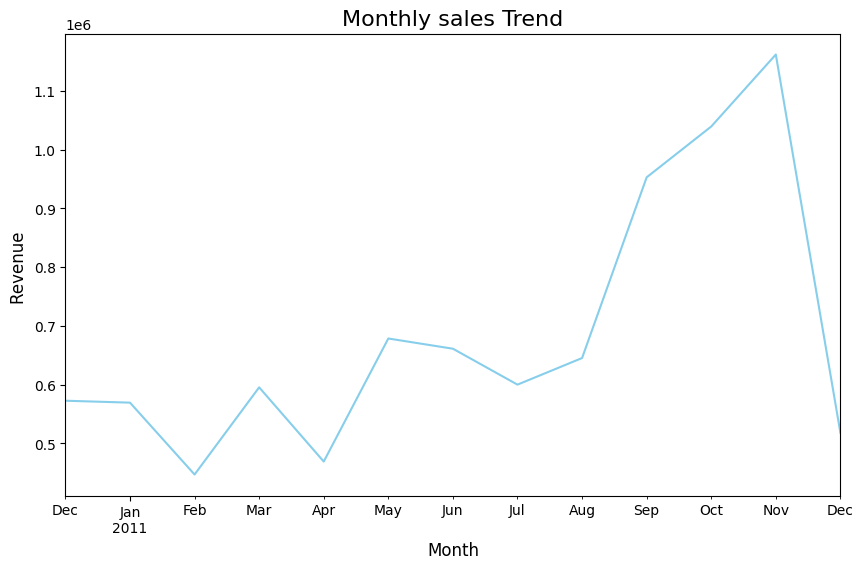

In [ ]:
# Using Matplotlib to plot the sales trend
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line',color='skyblue')

# Adding labels and title
plt.title('Monthly sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# Calculate total spending per customer
customer_spending = df.groupby('CustomerID')['revenue'].sum().sort_values(ascending=False)
print("Top 10 customer spending by revenue\n",customer_spending.head(10))

Top 10 customer spending by revenue
 CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: revenue, dtype: float64


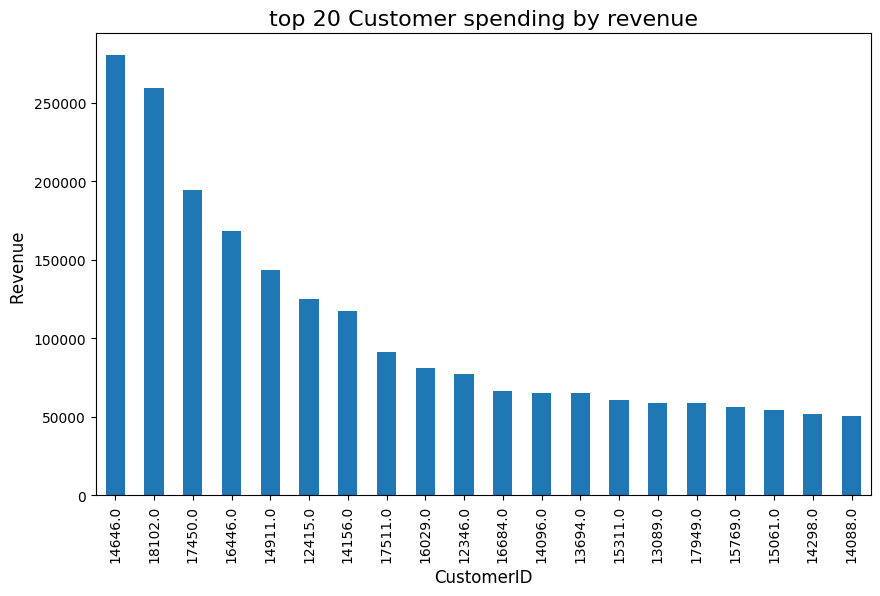

In [ ]:
# Plot top 10 customers by spending
plt.figure(figsize=(10,6))
customer_spending.head(20).plot(kind='bar')

# Adding labels and title
plt.title('top 20 Customer spending by revenue', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Revenue ', fontsize=12)

# Show the plot
plt.show()



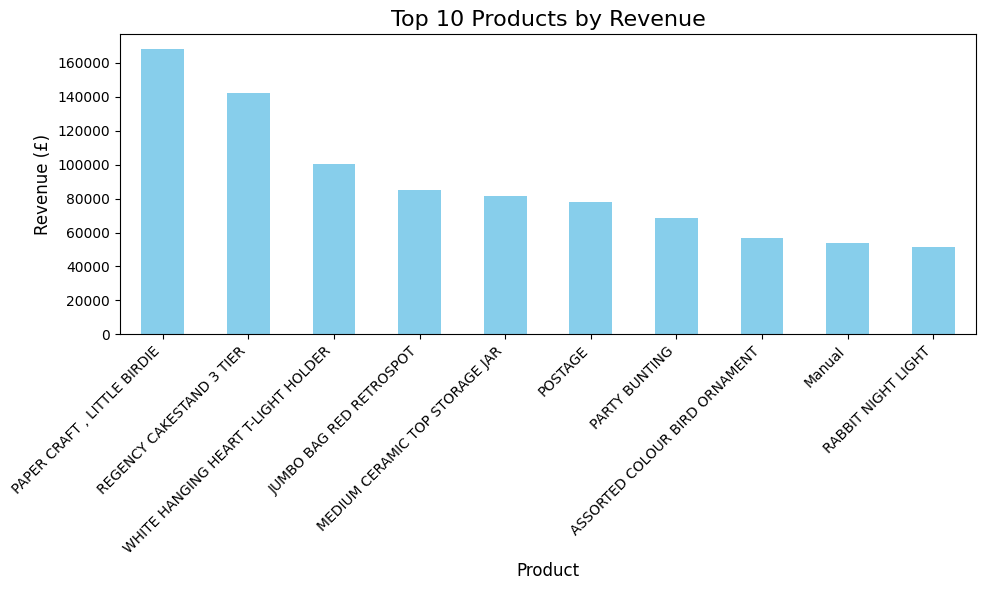

In [ ]:
# Group by 'Description' (product name) and sum the revenue
revenue_by_product = df.groupby('Description')['revenue'].sum().sort_values(ascending=False)

# Get the top 10 products
top_10_products = revenue_by_product.head(10)

# Plotting the bar chart
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the product names for better readability
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()


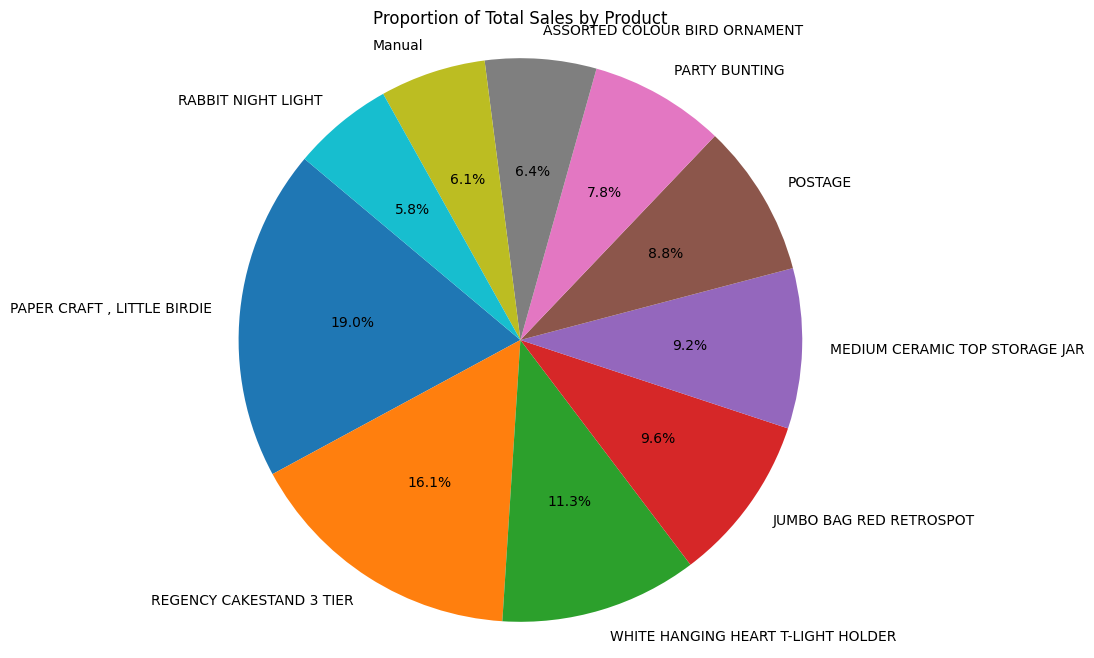

In [ ]:
# Remove any negative values and NaN values
revenue_by_product = revenue_by_product[revenue_by_product >= 0].dropna()
# Now, plot the pie chart for top 10 products
top_10_products = revenue_by_product.head(10)

# Pie Chart for top 10 products
plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Sales by Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#Top Countries by Revenue
revenue_by_country  =  df.groupby('Country')['revenue'].sum().sort_values(ascending=False)

#Get the top 10 Country
top_10_country = revenue_by_country.head(10)
top_10_country

,revenue
Country,
United Kingdom,8167128.184
Netherlands,284661.540
EIRE,262993.380
Germany,221509.470
France,197317.110
Australia,137009.770
Switzerland,56363.050
Spain,54756.030
Belgium,40910.960


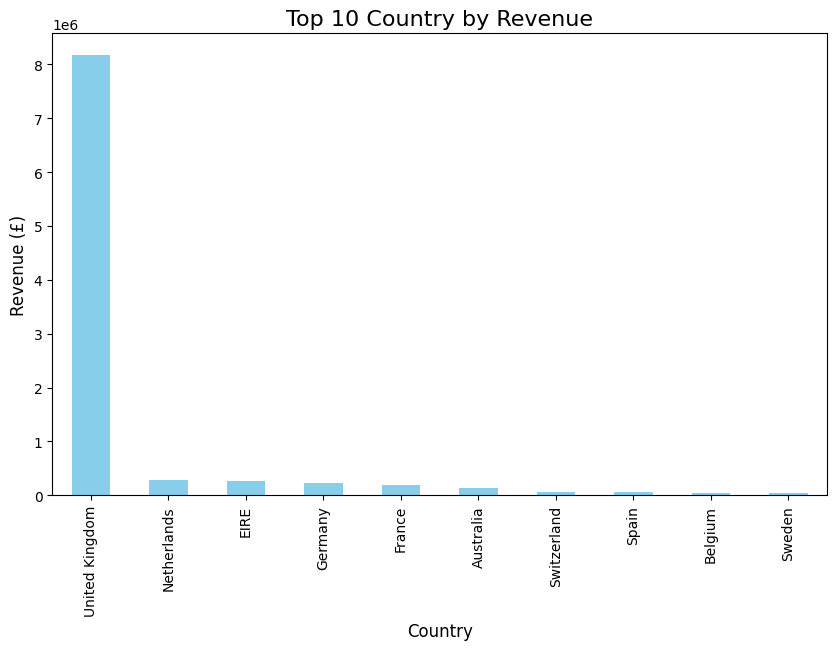

In [ ]:
# Plotting the bar chart

plt.figure(figsize=(10,6))
top_10_country.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Top 10 Country by Revenue', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.show()

In [ ]:
# Extract hour of the day from InvoiceDate
df['Hour'] =  df['InvoiceDate'].dt.hour

# Calculate total sales by hour
hour_sales = df.groupby('Hour')['revenue'].sum()
hour_sales

,revenue
Hour,
6,4.250
7,31059.210
8,282115.630
9,842605.171
10,1261192.571
11,1104558.750
12,1378571.480
13,1173264.750
14,995629.371


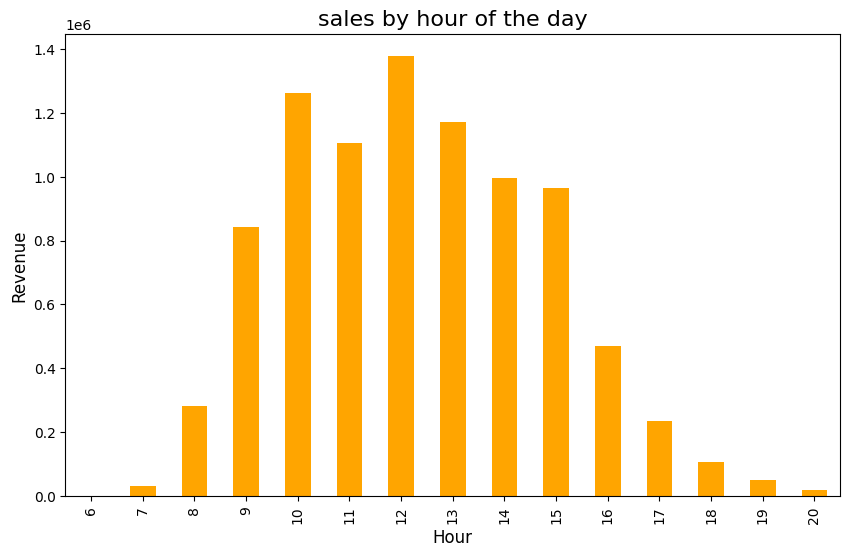

In [ ]:
plt.figure(figsize=(10,6))
hour_sales.plot(kind='bar', color='orange')

# Adding labels and title
plt.title('sales by hour of the day', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

In [ ]:
# Extract day of the week from InvoiceDate
# 0=Monday, 6=Sunday

df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Calculate total sales by day of the week
weekly_sales = df.groupby('DayOfWeek')['revenue'].sum()
print("Sales by Day of Week:\n", weekly_sales)

Sales by Day of Week:
 DayOfWeek
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: revenue, dtype: float64


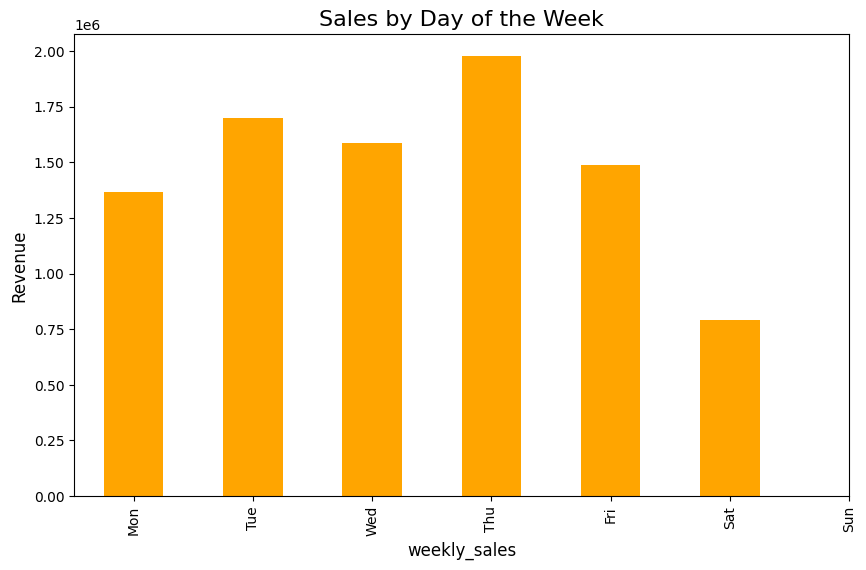

In [ ]:
plt.figure(figsize=(10,6))
weekly_sales.plot(kind='bar', color='orange')

# Adding labels and title
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('weekly_sales', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
# Calculate total sales and total transactions
total_sales = df['revenue'].sum()
total_transaction = df['InvoiceNo'].nunique()

# Calculate AOV
average_order_value = total_sales / total_transaction
print("Average Order Value (AOV):", average_order_value)

Average Order Value (AOV): 480.8659563997409


In [ ]:
# Count transactions per custome
customer_freq =  df.groupby('CustomerID')['revenue'].sum()
customer_freq.head(5)

,revenue
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


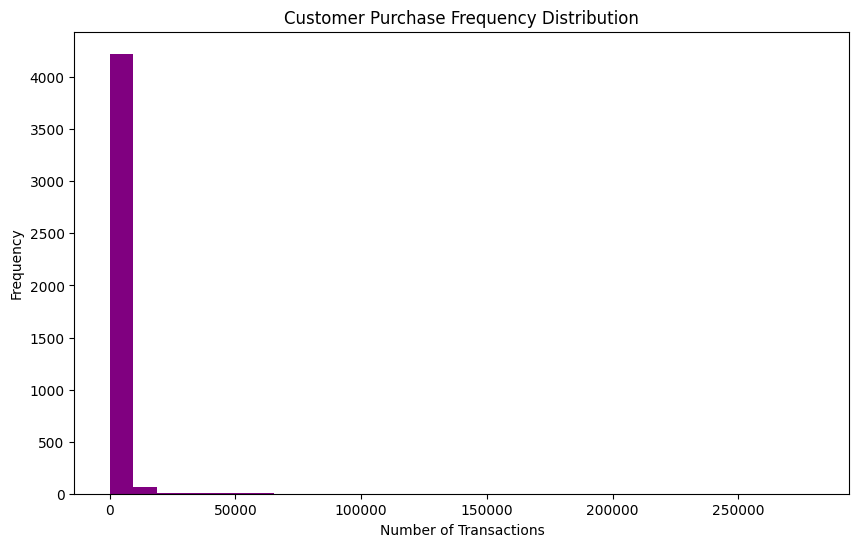

In [ ]:
# Plot purchase frequency distribution
customer_freq.plot(kind='hist', bins=30, figsize=(10, 6), color='purple')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

#RFM Customer Segmentation

In [ ]:
# Calculate Recency (days since last purchase)
recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (df['InvoiceDate'].max() - recency).dt.days

# Frequency: Number of purchases per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary: Total spending per customer
monetary = df.groupby('CustomerID')['revenue'].sum()

# Merge RFM features into one DataFrame
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Label: Define churn if a customer has not purchased in the last X days (e.g., 180 days)
rfm_df['Churn'] = rfm_df['Recency'].apply(lambda x: 1 if x > 180 else 0)   # 1 = Churned, 0 = Active

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
rfm_df.head(5)

,Recency,Frequency,Monetary,Churn,FuturePurchase
CustomerID,,,,,
12346.0,325,1,77183.60,1,0
12347.0,1,7,4310.00,0,1
12348.0,74,4,1797.24,0,0
12349.0,18,1,1757.55,0,1
12350.0,309,1,334.40,1,0


#Churn Prediction

In [ ]:
# Prepare data for modeling
X = rfm_df[['Recency', 'Frequency', 'Monetary']]  # Features
y = rfm_df['Churn']  # Target variable

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       822
           1       0.35      0.27      0.30       480

    accuracy                           0.54      1302
   macro avg       0.48      0.49      0.48      1302
weighted avg       0.52      0.54      0.53      1302



##Future Purchase Prediction

In [ ]:
rfm_df['FuturePurchase'] = rfm_df['Recency'].apply(lambda x: 1 if x < 30 else 0)  # 1 = Will purchase again, 0 = Will not

# Train a classification model (similar to churn prediction)
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['FuturePurchase']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)


In [ ]:
model_predict = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       822
           1       0.36      0.38      0.37       480

    accuracy                           0.53      1302
   macro avg       0.50      0.50      0.50      1302
weighted avg       0.53      0.53      0.53      1302

